
This material is subject to the terms and conditions of the [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/) license. Free use is permitted for any non-commercial purpose.


In [1]:
print('hello world')

hello world


# Лекция 03. Линейная регрессия
## Задач линейной регрессии

**Обучение с учителем**

Дан правильный ответ для каждого экземпляра данных 

![Искомый датасет](../../img/lec03_sample_dataset.png)
    
**Задача регрессии**

Предсказание реального значения вывода

**Обозначения**
* m = количество обучающих примеров
* x’s = входные переменные / признаки
* y’s = выходные переменные / “целевые” переменные
* (x, y): обучающий пример

## Модель обучения (гипотеза)

![Алгоритм обучения](../../img/learning_algorythm.png)

In [3]:

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pandas
import random
import matplotlib
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D
from JSAnimation import IPython_display
import sklearn.datasets as ds
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
import pandas as pd
import seaborn as sns
import warnings
from IPython.display import Video
%matplotlib inline
matplotlib.style.use('ggplot')
warnings.filterwarnings("ignore")


ImportError: dlopen(/Users/hiber/venv/lib/python3.8/site-packages/matplotlib/ft2font.cpython-38-darwin.so, 2): Symbol not found: _FT_Done_Face
  Referenced from: /Users/hiber/venv/lib/python3.8/site-packages/matplotlib/ft2font.cpython-38-darwin.so
  Expected in: flat namespace
 in /Users/hiber/venv/lib/python3.8/site-packages/matplotlib/ft2font.cpython-38-darwin.so

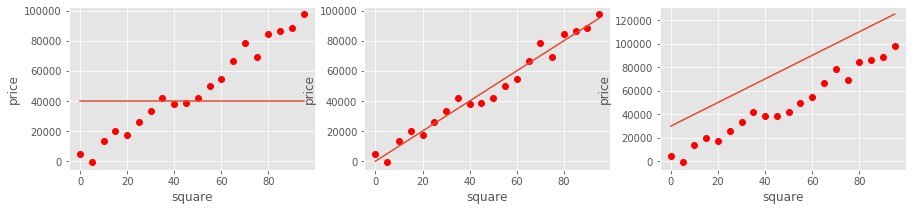

In [2]:

def rand_price(val):
    return (val * 1000 + random.randint(-10000, 10000))


squares = list(range(0, 100, 5))
prices = [rand_price(i) for i in squares]

plt.figure(figsize=(15, 3))
plt.subplot(131)
plt.plot(squares, prices, "ro", squares, [0 * x + 40000 for x in squares])
plt.ylabel('price')
plt.xlabel('square')
plt.subplot(132)
plt.plot(squares, prices, "ro", squares, [1000 * x for x in squares])
plt.ylabel('price')
plt.xlabel('square')
plt.subplot(133)
plt.plot(squares, prices, "ro", squares, [1000 * x + 30000 for x in squares])
plt.ylabel('price')
plt.xlabel('square')
plt.show()

## Как решить?
### Классический подход: нормальное уравнение
$W=(X^T X)^{-1} X^T y$

### А если у нас много данных?
Гипотеза:
$h(x)=w_0 + w_1 x$


<b>Идея: выбрать $w_0, w_1$ такие, что $h_w(x)$ близка к $y$ для наших обучающих примеров $(x, y)$</b>
    
$J(w)=\frac{1}{2} \sum_{i=1}^m (h_{w}(x^{(i)}) - y^{(i)})^2$

$J'(w)= \sum_{i=1}^m (h_{w}(x^{(i)}) - y^{(i)})x^{(i)}$


$h(x) = \sum_{i=0}^n w_i x_i = W^T X$

In [3]:
def calc_errors(weights, need_print = True):
    errors = []
    w_1s = []
    w_0s = []
    h_xs = []
    for w in weights:
        h_x = [(w['w_1'] * x + w['w_0']) for x in squares]
        mse = np.square(np.subtract(h_x, prices)).sum() / 2
        h_xs.append(h_x)
        errors.append(mse)
        w_1s.append(w['w_1'])
        w_0s.append(w['w_0'])
        if need_print:
            print("w_o:{}; w_1: {}; mse; {}".format(w['w_0'], w['w_1'], mse))

    return errors, h_xs, w_0s, w_1s


w_o:0; w_1: 0; mse; 29590410077.0
w_o:0; w_1: 200; mse; 18789049077.0
w_o:0; w_1: 500; mse; 7218257577.0
w_o:0; w_1: 1000; mse; 283605077.0
w_o:0; w_1: 1300; mse; 3532813577.0
w_o:0; w_1: 1500; mse; 8786452577.0
w_o:0; w_1: 1600; mse; 12339522077.0
w_o:0; w_1: 2000; mse; 32726800077.0


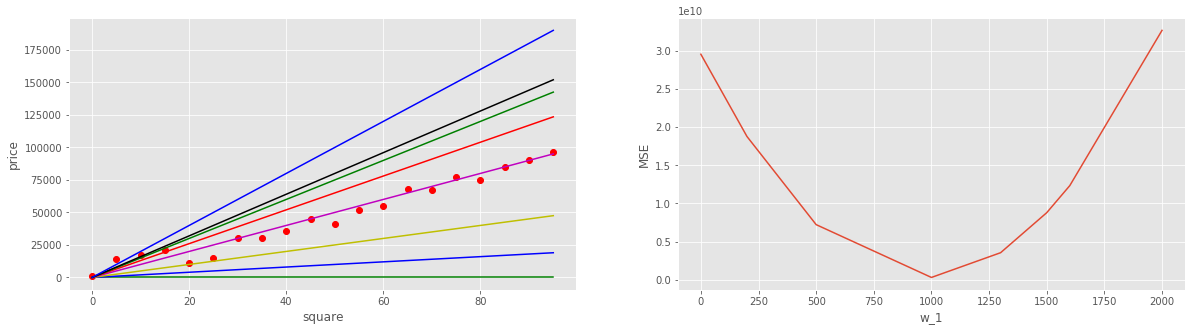

In [4]:
weights = []
weights.append({'w_0': 0, 'w_1': 0})
weights.append({'w_0': 0, 'w_1': 200})
weights.append({'w_0': 0, 'w_1': 500})
weights.append({'w_0': 0, 'w_1': 1000})
weights.append({'w_0': 0, 'w_1': 1300})
weights.append({'w_0': 0, 'w_1': 1500})
weights.append({'w_0': 0, 'w_1': 1600})
weights.append({'w_0': 0, 'w_1': 2000})

errors, h_xs, w_0s, w_1s = calc_errors(weights)
plt.figure(figsize=(20, 5))
plt.subplot(121)
plt.plot(squares, prices, "ro", squares, h_xs[0], "g", squares, h_xs[1], "b", squares, h_xs[2], "y", squares, h_xs[3], "m", squares, h_xs[4], "r", squares, h_xs[5], "g", squares, h_xs[6], "k", squares, h_xs[7], "b")
plt.xlabel('square')
plt.ylabel('price')

plt.subplot(122)
plt.plot(w_1s, errors)
plt.xlabel('w_1')
plt.ylabel('MSE')
plt.show()

## Как найти верные значения для весов Weights?
![Image of error](../../img/gd_ann.png)

## А если бы у нас было 2 веса weights? 

<Figure size 720x360 with 0 Axes>

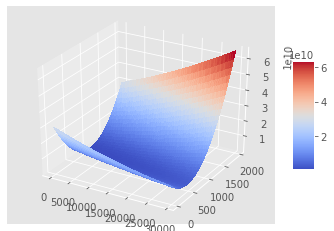

In [5]:

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

weights = []
for i in range(0, 2000, 50):
    for j in range(0, 30000, 500):
        weights.append({'w_0': j, 'w_1': i})
errors, h_xs, w_0s, w_1s = calc_errors(weights, False)

plt.figure(figsize=(10, 5))
fig = plt.figure()
ax = fig.gca(projection='3d')

surf = ax.plot_trisurf(np.array(w_0s), np.array(w_1s), np.array(errors), cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()


![](../../img/lec03_3dgradient.png)

## Градиентный спуск

Имеем некоторую функцию $J(W_1, W2)$

Хотим минимизировать $min_{W_1, W_2} J(W_1, W_2)$

**План**:
* Начнем с некоторыми $W_1, W_2$ (например, $0, 0$)
* Продолжаем менять $W_1, W_2$, чтобы уменьшить $J(W_1, W_2)$, до тех пор, пока мы (надеясь на успех) не достигнем минимума

![](../../img/lec03_3dgradient_way.png)
![](../../img/lec03_3dgradient_way2.png)


## Алгоритм гардиентного спуска

**Повторять до схождения**:
$W_j = W_j - \alpha \frac{\partial}{\partial W_j} J(W_0, W_1)$ for $j = 0$ and $j = 1$

**Верно: одновременное обновление update**
* $temp0 = W_0 - \alpha \frac{\partial}{\partial W_0} J(W_0, W_1)$
* $temp1 = W_1 - \alpha \frac{\partial}{\partial W_1} J(W_0, W_1)$
* $W_0 = temp0$
* $W_1 = temp1$

**Неверно:**
* $temp0 = W_0 - \alpha \frac{\partial}{\partial W_0} J(W_0, W_1)$
* $W_0 = temp0$
* $temp1 = W_1 - \alpha \frac{\partial}{\partial W_1} J(W_0, W_1)$
* $W_1 = temp1$

**$\alpha$ - скорость обучения, $\frac{\partial}{\partial W_j} J(W_0, W_1)$ - частная производная**

![](../../img/lec03_derivative.png)

**Выбираем $\alpha$:**
* если $\alpha$ слишком мала, градиентный спуск может быть очень медленным
* если $\alpha$ слишком велика, градиентный спуск может проскочить минимум. Он может не сойтись, или даже райзойтись. 

![](../../img/lec03_alpha.png)


**Градиентный спуск может сойтись к локальному минимуму, даже если скорость обучения $\alpha$ зафиксированна**. 

Он автоматически будет уменьшать шаги. Следовательно, нет необходимости постоянно уменьшать $\alpha$. 

![](../../img/lec03_alpha_decrease.png)

![](../../img/lec03_converge.gif)

**Общий градиентный спуск**: каждый шаг градиентного спуска использует все обучающие примеры! 

![](../../img/lec03_bgd.png) ![](../../img/lec03_sgd.png)


# Градиентного спуск
Смысл Градиентного Спуска состоит в том, чтобы изменять$x$ на небольшое значение по направлению к спуску. 
В качестве примера рассмотрите эту квадратичную функцию: 

$$
f(x) = x^2 - 6x + 5
$$

Local minimum occurs at 3.05.


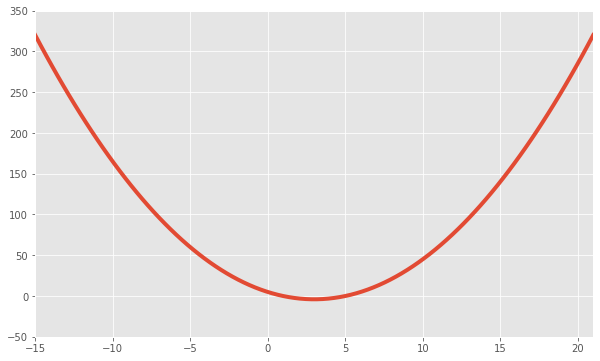

In [6]:
# функции анимации
def init():
    line.set_data([], [])
    return line,

def animate(i):
    x_n = mins[0::10][i]
    y_n = x_n**2-6*x_n+5
    line.set_data(x_n, y_n)
    return line,

# функция, которую мы хотим оптимизировать
def f(x):
    return x**2 - 6*x + 5

# производные оптимизированной функции 
def f_derivative(x):
    return 2*x -6

x = np.linspace(-15,21,100)  #x значения
y = f(x)                     #значения функции
old_min = 0                  #предыдущий минимум
temp_min = 15                #текущий минимум
step_size = 0.01             #скорость обучения
precision = 0.001            #критерий останова
 
mins = [] #массив для минимумов
cost = [] #массив для ошибок
while abs(temp_min - old_min) > precision:
    old_min = temp_min 
    gradient = f_derivative(old_min) 
    move = gradient * step_size
    temp_min = old_min - move
    # мы рассчитываем ошибку, так как знаем фактический минимум 
    cost.append((3-temp_min)**2) 
    mins.append(temp_min)
print("Local minimum occurs at {}.".format(round(temp_min,2)))

fig = plt.figure(figsize=(10, 6))
ax = plt.axes(xlim=(-15, 21), ylim=(-50, 350))
ax.plot(x, y, linewidth=4)
line, = ax.plot([], [], "D", markersize=12)

a = animation.FuncAnimation(fig, animate, init_func=init,
                        frames=len(mins[0::10]), interval=200)
a.save('gd.mp4', fps=30, extra_args=['-vcodec', 'libx264'])

Video("gd.mp4")

Алгоритм Градиентного Спуска для этой функции может быть реализован так:

In [7]:
def gradient_descent(theta0, iters, alpha):
    history = [theta0] # сохранить все теты
    theta = theta0     # начальны значения для тет 
    # главный цикл итераций:
    for i in range(iters):
        # градиент [2x, 2y]:
        gradient = [2.0*x for x in theta] 
        # обновляем параметры:
        theta = [a - alpha*b for a,b in zip(theta, gradient)]
        history.append(theta)
    return history

Параметрами этой функции являются: ```w0``` - первоначальная догадка для минимума, ```iters``` - количество итераций, ```alpha``` - скорость обучения. Мы вызываем эту функцию и отрисовываем результаты после каждой итерации в коде ниже. 

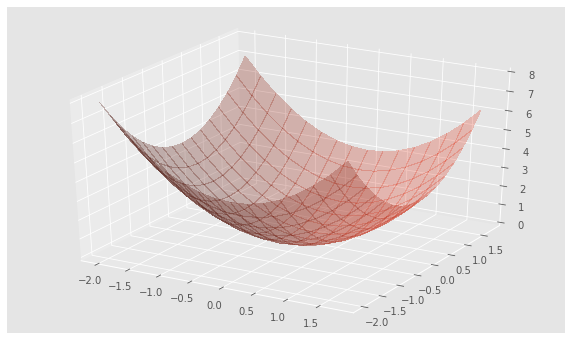

In [8]:
def f(a,b):
    return a**2 + b**2

fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
a = np.arange(-2, 2, 0.25)
b = np.arange(-2, 2, 0.25)
a, b = np.meshgrid(a, b)
c = f(a,b)
surf = ax.plot_surface(a, b, c, rstride=1, cstride=1, alpha=0.3, 
                       linewidth=0, antialiased=False)
ax.set_zlim(-0.01, 8.01)

plt.show()

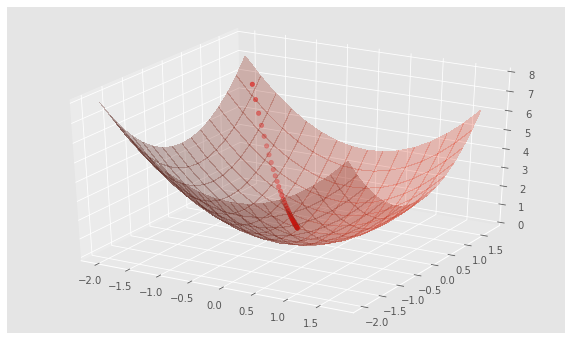

In [9]:

history = gradient_descent(theta0 = [-1.8, 1.6], iters = 30, alpha = 0.03)

fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
#plt.hold(True)
a = np.arange(-2, 2, 0.25)
b = np.arange(-2, 2, 0.25)
a, b = np.meshgrid(a, b)
c = f(a,b)
surf = ax.plot_surface(a, b, c, rstride=1, cstride=1, alpha=0.3, 
                       linewidth=0, antialiased=False)
ax.set_zlim(-0.01, 8.01)

a = np.array([x[0] for x in history])
b = np.array([x[1] for x in history])
c = f(a,b)
ax.scatter(a, b, c, color="r"); 

plt.show()

К сожалению, если функция имеет несколько экстремумов, Градиентный Спуск может найти локальный минимум вместо глобального. Есть уловка, позволяющая преодолеть этот недостаток: запустить SGD (Стохастический Градиентный Спуск) несколько раз с различными первоначальными прикидками $x$. Ниже представлен пример функции, где  Градиентный Спуск может быть неэффективен:

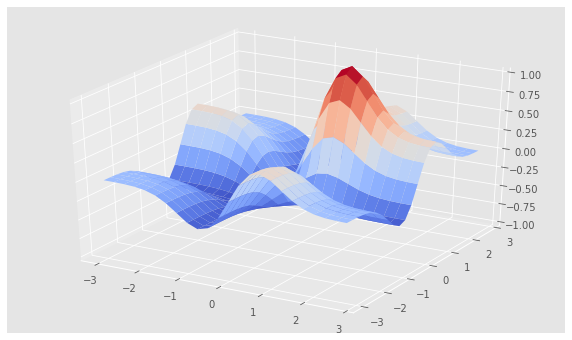

In [10]:
def f(a,b):
    return 2*a*b*np.exp(-a**2 - b**2) + a*np.exp(-a**2) + b*np.exp(-b**2)

fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')

a = np.arange(-3, 3, 0.25)
b = np.arange(-3, 3, 0.25)
a, b = np.meshgrid(a, b)
c = f(a,b)
surf = ax.plot_surface(a, b, c, rstride=1, cstride=1, cmap=cm.coolwarm, 
                       linewidth=0, antialiased=True)
ax.set_zlim(-1.01, 1.01)

plt.show()

# Градиентный Спуск для Линейной Регрессии (один признак)
Для линейной регрессии рассмотрим функцию затрат
$$
J(W) = \dfrac{1}{2} \sum\limits_{i=1}^{m} (h_{W} (x^{(i)}) - y^{(i)})^2.
$$ 
В качестве одной из свойственных проблем, данная функция становится функцией двух переменных, поскольку нам необходимо добавить смещение к набору признаков. Решим это, добавив столбец единиц в матрицу $X$.


In [8]:
X_train,y_train = ds.make_regression(n_samples=100, 
                                     n_features=1, 
                                     n_informative=1, 
                                     noise=20.0, 
                                     bias=50, 
                                     random_state=2016)
y_train = y_train/10 # значение масштаба для более наглядного отображения 

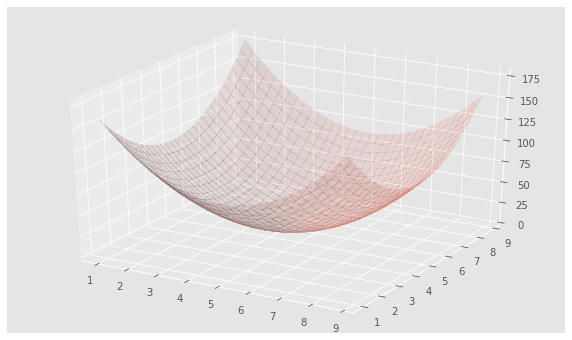

In [9]:
X_train_bias = np.c_[np.ones(X_train.shape[0]), X_train]
def cost_function(x, y, theta):
    y = y.reshape((-1,1))
    theta = np.array(theta).reshape((2,-1))
    return np.sum((np.dot(x, theta) - y) ** 2, axis=0)/(2*10)

fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
a = np.arange(1, 9, 0.25)
b = np.arange(1, 9, 0.25)
a, b = np.meshgrid(a, b) # создаем сетку значений из a и b
# мы используем векторизацию для ускорения вычислений
c = cost_function(X_train_bias, y_train, np.c_[a.ravel(), b.ravel()].T).reshape(a.shape)

surf = ax.plot_surface(a, b, c, rstride=1, cstride=1, alpha=0.1, 
                       linewidth=0, antialiased=False)
ax.set_zlim(-0.01, 180.01)

plt.show()

Для того, чтобы сравнить Общий и Стохастический Градиентные Спуски, мы реализуем их отдельно.

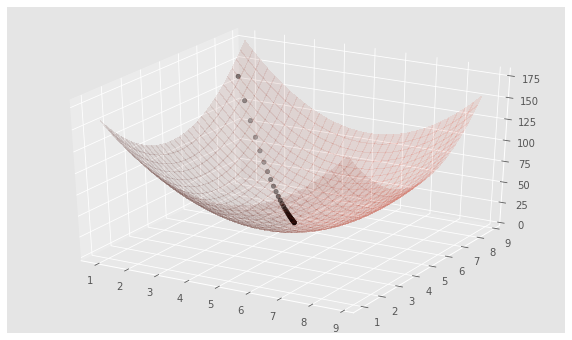

In [11]:
def batch_gradient_descent(x, y, theta0, iters, alpha):
    theta = theta0    # начальны значения для тет
    history = []      # массив тет
    costs = []        # массив стоимостей
    # главный цикл итераций:
    for i in range(iters):
        history.append(theta)
        cost = cost_function(x, y, theta)[0]
        costs.append(cost)
        pred = np.dot(x, theta)
        error = pred - y 
        gradient = x.T.dot(error)
        theta = theta - alpha * gradient  # update
    return history, costs

history, costs = batch_gradient_descent(X_train_bias, y_train, 
                                        theta0 = [1.2, 8], 
                                        iters = 30, 
                                        alpha = 0.001)
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(a, b, c, rstride=1, cstride=1, alpha=0.1, 
                       linewidth=0, antialiased=False)
ax.set_zlim(-0.01, 180.01)

t0 = np.array([x[0] for x in history])
t1 = np.array([x[1] for x in history])
ax.scatter(t0, t1, costs, color="k"); 

plt.show()

Как вы могли заметить, алгоритм нашел наибыстрейший путь к минимуму. Стохастический Градиентный Спуск не нашел кратчайший путь, но в большинстве случаев намного быстрее, потому что он не использует все обучающие примеры, чтобы обновить параметры:

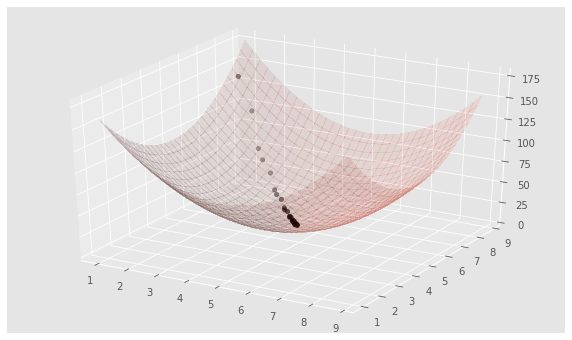

In [12]:
def stochastic_gradient_descent(x, y, theta0, iters, alpha):
    theta = theta0    # начальные значения для тет
    history = []      # массив тет
    costs = []        # массив стоимостей
    m = y.size        # набор тренировочных значений
    # главный цикл итераций:
    for i in range(iters):
        for j in range(m):
            pred = np.dot(x[j,:], theta)
            error = pred - y[j]
            gradient = error * x[j,:]
            theta = theta - alpha * gradient  # update
            if j % 40 == 0: 
                history.append(theta)
                cost = cost_function(x, y, theta)[0]
                costs.append(cost)
    return history, costs

history, costs = stochastic_gradient_descent(X_train_bias, y_train, 
                                             theta0 = [1.2, 8], 
                                             iters = 10, 
                                             alpha = 0.005)

fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(a, b, c, rstride=1, cstride=1, alpha=0.1, 
                       linewidth=0, antialiased=False)
ax.set_zlim(-0.01, 180.01)

t0 = np.array([x[0] for x in history])
t1 = np.array([x[1] for x in history])
ax.scatter(t0, t1, costs, color="k"); 

plt.show()

Когда мы применяем алгоритм Градиентного Спуска к линейной регрессии, наша прямая линия постепенно приближается к линии, подходящей к нашим данным наилучшим образом. Мы применяем метод свыше ```batch_gradient_descent```, чтобы подобрать коэффициенты в линейной регрессии.

In [13]:
alpha = 0.001             # скорость оубчения
iters = 100               # количество итераций
theta = np.random.rand(2) #  изначальные приблизительные значения тет 
history, cost = batch_gradient_descent(X_train_bias, y_train, theta, iters, alpha)
theta = history[-1]
print("Parameters thetas after gradient descent: " + ", ".join([str(round(x,2)) for x in theta]))
best_fit_gradient_descent = theta[0] + X_train[:,0] * theta[1]

Parameters thetas after gradient descent: 4.98, 4.82


Заметьте, что параметры ручной имплементации очень близки к параметрам из ```scikit-learn```. 
Анимированный график, показывающий как работает Градиентный Спуск для линейной регрессии:

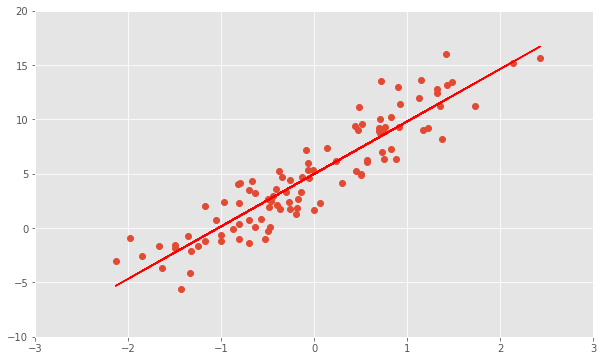

In [16]:
# функции анимации
def init():
    line.set_data([], [])
    return line,

def animate(i):
    w = history[i].reshape((-1,1))
    line.set_data(X_train[:, 0], np.dot(X_train_bias, w))
    return line,

fig = plt.figure(figsize=(10,6))
ax = plt.axes(xlim=(-3, 3), ylim=(-10, 20))
ax.plot(X_train[:,0], y_train, 'o')
line, = ax.plot([], [], lw=2)

plt.plot(X_train[:,0], best_fit_gradient_descent, 'k-', color = "r")



In [17]:

a = animation.FuncAnimation(fig, animate, init_func=init,
                        frames=len(history), interval=100, blit=True)
a.save('sgd.mp4', fps=30, extra_args=['-vcodec', 'libx264'])
Video("sgd.mp4")

## Как проще всего использовать Линейную Регрессию?

In [4]:
X_train,y_train = ds.make_regression(n_samples=100, 
                                     n_features=1, 
                                     n_informative=1, 
                                     noise=20.0, 
                                     bias=50, 
                                     random_state=2016)
y_train = y_train/10 # цель масштабирования, чтобы улучшать изображения 

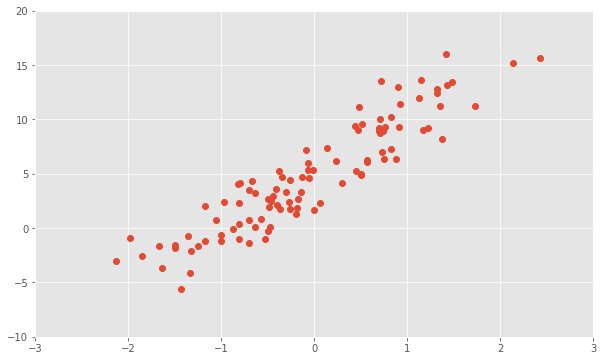

In [5]:
fig = plt.figure(figsize=(10,6))
ax = plt.axes(xlim=(-3, 3), ylim=(-10, 20))
ax.plot(X_train[:,0],y_train,'o')
plt.show()

Теперь мы посторили нашу первую модель, используя метод ```LinearRegression``` из пакета ```scikit-learn```. Заметьте, что когда вы работаете с ```scikit-learn```, обучение разных моделей очень схоже. Чаще всего, обучение подразумевает следующие шаги:
1. Создать класс для модели и определить все параметры 
2. Использовать метод для подбора и обучения модели на обучающих примерах
3. Использовать метод predict или predict\_proba, чтобы получить прогнозы по тестируемым примерам 

В нашем примере у нас нет тестовых примеров, поэтому мы обучаем модель линейной регрессии и получаем из нее коэффициенты.


In [6]:
model = LinearRegression() # создаем объект класса LinearRegression 

model.fit(X_train,y_train) # обучаем модель на обучающих примерах 
best_fit = model.predict(X_train)
intercept = model.intercept_
slope = model.coef_[0]
best_fit = X_train[:,0] * slope + intercept
print ("Parameters thetas: " + str(round(model.intercept_,2)) + ", " + ", ".join([str(round(x,2)) for x in model.coef_]))

Parameters thetas: 4.98, 4.83


Наконец, мы визуализируем наши данные вдоль линии регрессии.

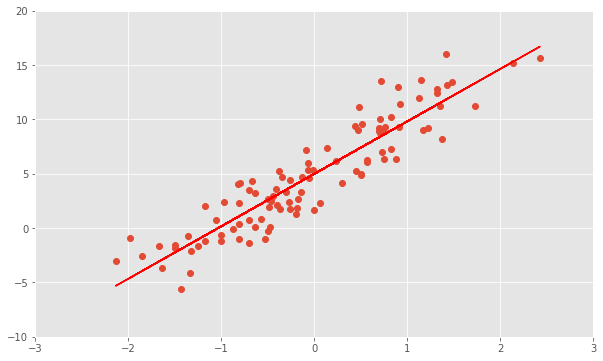

In [33]:
fig = plt.figure(figsize=(10,6))
ax = plt.axes(xlim=(-3, 3), ylim=(-10, 20))
ax.plot(X_train[:,0],y_train,'o')
line, = ax.plot([], [], lw=2)
plt.plot(X_train[:,0], best_fit, 'k-', color = "r")
plt.show()

# Масштабирование признаков (Feature scaling)

Удостоверьтесь, что признаки имеют один и тот же масштаб, примерно $-1 < x_i < 1$

$x_i = \frac{x_i - \mu}{\sigma}$, where

* $\mu$ математическое ожидание (среднее значение)
* $\sigma$ стандартное отклонение от мат. ожидания


<sub>примеры: http://benalexkeen.com/feature-scaling-with-scikit-learn/<sub>

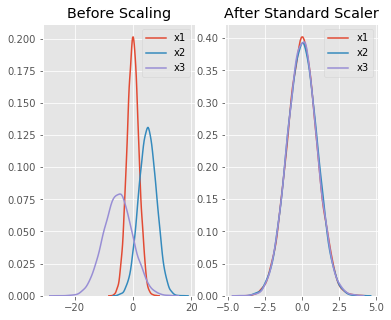

In [22]:
np.random.seed(1)
df = pd.DataFrame({
    'x1': np.random.normal(0, 2, 10000),
    'x2': np.random.normal(5, 3, 10000),
    'x3': np.random.normal(-5, 5, 10000)
})

scaler = preprocessing.StandardScaler()
scaled_df = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_df, columns=['x1', 'x2', 'x3'])

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6, 5))

ax1.set_title('Before Scaling')
sns.kdeplot(df['x1'], ax=ax1)
sns.kdeplot(df['x2'], ax=ax1)
sns.kdeplot(df['x3'], ax=ax1)
ax2.set_title('After Standard Scaler')
sns.kdeplot(scaled_df['x1'], ax=ax2)
sns.kdeplot(scaled_df['x2'], ax=ax2)
sns.kdeplot(scaled_df['x3'], ax=ax2)
plt.show()

## Min-Max преобразователь (Scaler)

$x_i = \frac{x_i - min(x)}{max(x) - min(x)}$

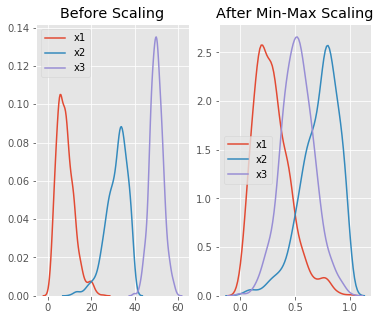

In [23]:
df = pd.DataFrame({
    # положительная асимметрия
    'x1': np.random.chisquare(8, 1000),
    # отрциательная асимметрия
    'x2': np.random.beta(8, 2, 1000) * 40,
    # отсутствие асимметрии
    'x3': np.random.normal(50, 3, 1000)
})

scaler = preprocessing.MinMaxScaler()
scaled_df = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_df, columns=['x1', 'x2', 'x3'])

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6, 5))
ax1.set_title('Before Scaling')
sns.kdeplot(df['x1'], ax=ax1)
sns.kdeplot(df['x2'], ax=ax1)
sns.kdeplot(df['x3'], ax=ax1)
ax2.set_title('After Min-Max Scaling')
sns.kdeplot(scaled_df['x1'], ax=ax2)
sns.kdeplot(scaled_df['x2'], ax=ax2)
sns.kdeplot(scaled_df['x3'], ax=ax2)
plt.show()